In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - FEATURE ENGINEERING
import string #punctuation
import nltk #English language stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import re
import spacy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /home/patricia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patricia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Prepare the dataset

In [2]:
file_path = '/home/patricia/code/ChristineSi/neuroCraft/raw_data/CLEAR Corpus 6.01 - CLEAR Corpus 6.01.csv'
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
# Display the DataFrame
df.head()


,ID,Last Changed,Author,Title,Anthology,URL,Source,Pub Year,Category,Location,...,CAREC_M,CARES,CML2RI,firstPlace_pred,secondPlace_pred,thirdPlace_pred,fourthPlace_pred,fifthPlace_pred,sixthPlace_pred,Kaggle split
0,400,NaN,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,gutenberg,1914.0,Lit,mid,...,0.11952,0.457534,12.097815,-0.383831,-0.283604,-0.346879,-0.281620,-0.247767,-0.289945,Train
1,401,NaN,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,gutenberg,1917.0,Lit,mid,...,0.04921,0.462510,22.550179,-0.260307,-0.209960,-0.061565,-0.234231,-0.201347,-0.156156,Train
2,402,NaN,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,gutenberg,1917.0,Lit,mid,...,0.09724,0.369259,18.125279,-0.615037,-0.530600,-0.527847,-0.550180,-0.565762,-0.538852,Train
3,403,NaN,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,gutenberg,1863.0,Lit,mid,...,0.08856,0.390759,10.959460,-1.528806,-1.525546,-1.471455,-1.265776,-1.422547,-1.393155,Test
4,404,NaN,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,gutenberg,1889.0,Lit,mid,...,0.08798,0.389226,3.195960,-1.335586,-1.321922,-1.163985,-1.122501,-1.185518,-1.271324,Train


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Last Changed                        139 non-null    float64
 2   Author                              4724 non-null   object 
 3   Title                               4724 non-null   object 
 4   Anthology                           2712 non-null   object 
 5   URL                                 4724 non-null   object 
 6   Source                              4724 non-null   object 
 7   Pub Year                            4715 non-null   float64
 8   Category                            4724 non-null   object 
 9   Location                            4724 non-null   object 
 10  License                             4724 non-null   object 
 11  MPAA
Max                            4724 no

In [4]:
df.columns


Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [5]:
columns_to_drop = ['Last Changed', 'Anthology', 'URL', 'License','MPAA \n#Max', 'MPAA\n#Avg',
                   'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
                   'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()


,ID,Author,Title,Source,Pub Year,Category,Location,MPAA\nMax,Excerpt,Google\nWC,...,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split
0,400,Carolyn Wells,Patty's Suitors,gutenberg,1914.0,Lit,mid,G,When the young people returned to the ballroom...,174,...,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,Train
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,1917.0,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,...,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,Train
2,402,Carolyn Wells,Patty Blossom,gutenberg,1917.0,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,...,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,Train
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,1863.0,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,...,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,Test
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,1889.0,Lit,mid,PG,And outside before the palace a great garden w...,163,...,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,Train


In [6]:
#pip install ydata-profiling
# pip install ipywidgets
#import numpy as np
#from ydata_profiling import ProfileReport


In [7]:
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_widgets()    #it takes 3-4 min


In [8]:
# Save the profile report as an HTML file
#profile.to_file("profile_report.html")


## Check for missing values

In [9]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

print(f"Columns with missing values: {columns_with_missing_values}")


Columns with missing values: Index(['Pub Year', 'British Words'], dtype='object')


In [10]:
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Print columns and their respective counts of missing values
for column in columns_with_missing_values.index:
    count = columns_with_missing_values[column]
    print(f"Column '{column}': {count} missing values")


Column 'Pub Year': 9 missing values
Column 'British Words': 4280 missing values


We don't have British Words on each text fragment. We decide to drop this column.

In [11]:
df.drop(columns=['British Words'])
# Verify that the column has been dropped
print("Columns after dropping 'British Words':", df.columns)


Columns after dropping 'British Words': Index(['ID', 'Author', 'Title', 'Source', 'Pub Year', 'Category', 'Location',
       'MPAA\nMax', 'Excerpt', 'Google\nWC', 'Joon\nWC v1', 'British WC',
       'British Words', 'Sentence\nCount v1', 'Sentence\nCount v2',
       'Paragraphs', 'BT Easiness', 'BT s.e.', 'Flesch-Reading-Ease',
       'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
       'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC',
       'CAREC_M', 'CARES', 'CML2RI', 'Kaggle split'],
      dtype='object')


## Check for duplicates

In [12]:
#Let's check the duplicates (profile reports says 0 duplicated rows)
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] == 0:
    print("There are no duplicate rows in the DataFrame.")
else:
    print(f"There are {duplicate_rows.shape[0]} duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


Let's explore the numeric, text and categorical variables:

In [13]:
numeric_variables = df.select_dtypes(include=['number'])

# Explore summary statistics for numeric variables
numeric_summary = numeric_variables.describe()
print("Summary statistics for numeric variables:")
print(numeric_summary)


Summary statistics for numeric variables:
                ID     Pub Year   Google\nWC  Joon\nWC v1   British WC  \
count  4724.000000  4715.000000  4724.000000  4724.000000  4724.000000   
mean   4366.347163  1937.886957   171.960203   176.925487     0.129340   
std    1896.363710    60.506795    16.988921    18.173592     0.471049   
min     400.000000  1728.000000   125.000000   135.000000     0.000000   
25%    2769.750000  1884.000000   158.000000   162.000000     0.000000   
50%    4483.500000  1915.000000   174.000000   178.000000     0.000000   
75%    5939.250000  2016.000000   186.000000   191.000000     0.000000   
max    8031.000000  2020.000000   205.000000   220.000000     9.000000   

       Sentence\nCount v1  Sentence\nCount v2   Paragraphs  BT Easiness  \
count         4724.000000         4724.000000  4724.000000  4724.000000   
mean             9.570703            9.752329     2.542337    -0.957639   
std              4.640162            4.681339     1.866298     1.0

Pub Year: 1728-2020\
Google WC, Joon WC v1, British WC: word counts from different sources


## Check for outliers

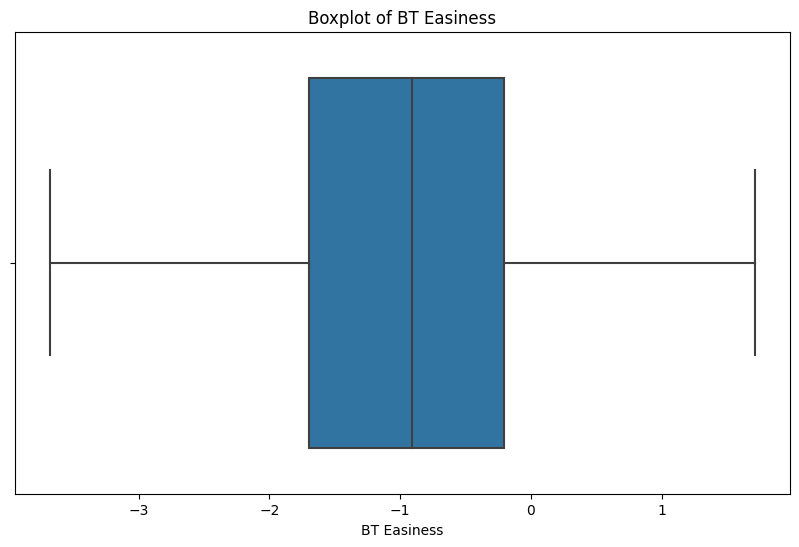

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add this line to enable inline plotting in Jupyter/IPython
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.boxplot(x='BT Easiness', data=df)
plt.title('Boxplot of BT Easiness')
plt.show()


In [15]:
text_variables = df.select_dtypes(include=['object'])

# Explore unique values and word frequency for text variables
for column in text_variables.columns:
    unique_values = text_variables[column].unique()
    word_frequency = text_variables[column].str.split().explode().value_counts()

    print(f"Column: {column}")
    print("Unique values:", unique_values)
    print("Word frequency:")
    print(word_frequency)
    print("\n")


Column: Author
Unique values: ['Carolyn Wells' 'CHARLES KINGSLEY' 'Charles Kingsley' ...
 'original text by Steve Whitt\nadapted by Jessica Fries-Gaither'
 'Stephen Whitt' 'wikijunior']
Word frequency:
Author
wiki         275
simple       275
wikipedia    274
?            271
&            173
            ... 
Happy          1
Kwamie         1
Ofori          1
Da             1
Mhlophe        1
Name: count, Length: 4848, dtype: int64


Column: Title
Unique values: ["Patty's Suitors" 'Two Little Women on a Holiday' 'Patty Blossom' ...
 'Bugs/Black Widow' 'Solids' 'Anials']
Word frequency:
Title
The          946
the          777
THE          752
of           729
and          454
            ... 
Herd           1
Pet            1
rooster        1
Fireflies      1
Anials         1
Name: count, Length: 8467, dtype: int64


Column: Source
Unique values: ['gutenberg' 'simple.wikipedia' 'kids.frontiersin' 'wikipedia'
 'africanstorybook' 'ck12' 'freekidsbooks' 'commonlit' 'emedia.uen.org'
 'digit

What should we do to handle the class imbalace? (Source and MPAA Max Values)

In [23]:
df.to_csv('/home/patricia/code/ChristineSi/neuroCraft/raw_data/classification.csv', index=False)
